In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

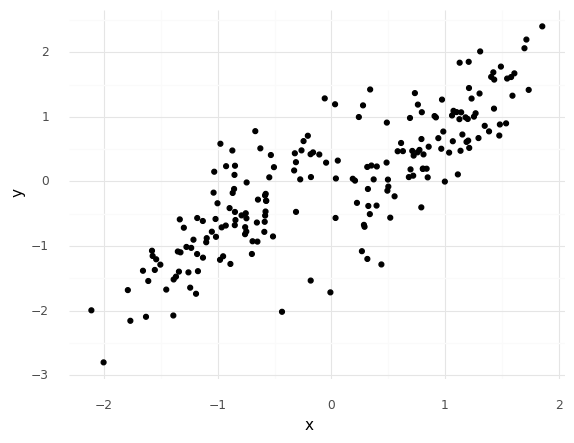

<ggplot: (158978285544)>

In [2]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [3]:
d1.head()

,x,y
0,1.209113,1.852323
1,0.352802,0.246308
2,1.204704,0.632357
3,0.735551,1.367752
4,1.153633,0.726711


K-means

<AxesSubplot:xlabel='x', ylabel='y'>

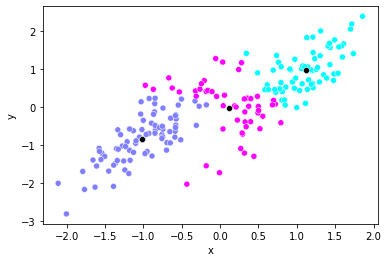

In [167]:
#using K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(d1)
kmeans.cluster_centers_
kmeans.labels_

sns.scatterplot(x=d1['x'], y=d1['y'], c=kmeans.labels_, cmap='cool' )
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [168]:
# grab only clustered data points
d1["assignments"] =kmeans.labels_
d1_clustered = d1.loc[(d1.assignments >= 0)]
#silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

In [169]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39958260529811457

Hierarchical Clustering

In [170]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster.fit(d1)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [172]:
cluster.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

<AxesSubplot:xlabel='x', ylabel='y'>

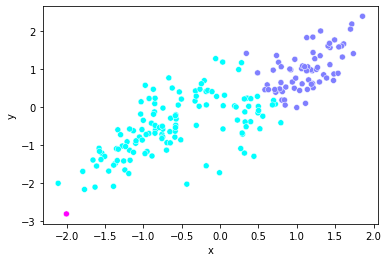

In [173]:
sns.scatterplot(x=d1['x'], y=d1['y'], c=cluster.labels_, cmap='cool' )

In [177]:
d1["assignments"] =cluster.labels_

In [178]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]

#silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

In [179]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39219050963795055

Dbscan

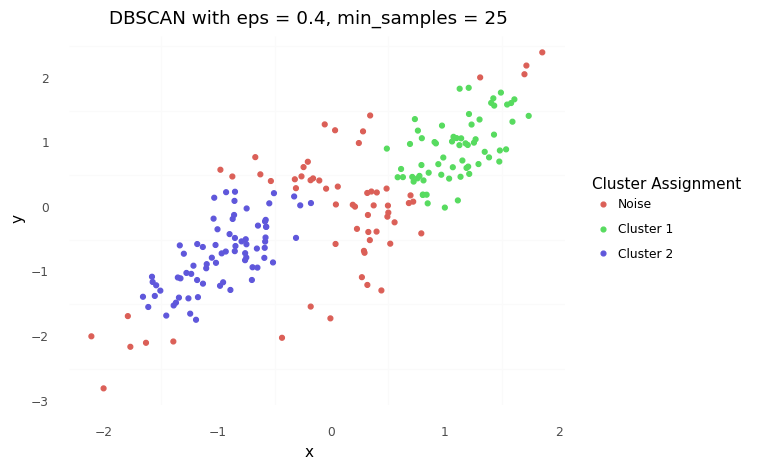

<ggplot: (158985190690)>

In [180]:
# dbscan and plot
db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.4, min_samples = 25"))

In [181]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]
silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.714573207519496

In [183]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.364141247743528

GMM

<AxesSubplot:xlabel='x', ylabel='y'>

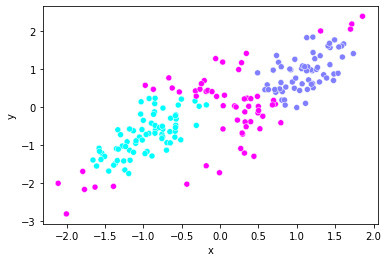

In [184]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(d1)
labels = gm.predict(d1)
sns.scatterplot(x=d1['x'], y=d1['y'], c=labels, cmap='cool' )

In [186]:
d1["assignments"] =labels
d1_clustered = d1.loc[(d1.assignments >= 0)]
silhouette_score(d1[["x","y"]], d1["assignments"])

0.364141247743528

## Dataset 2

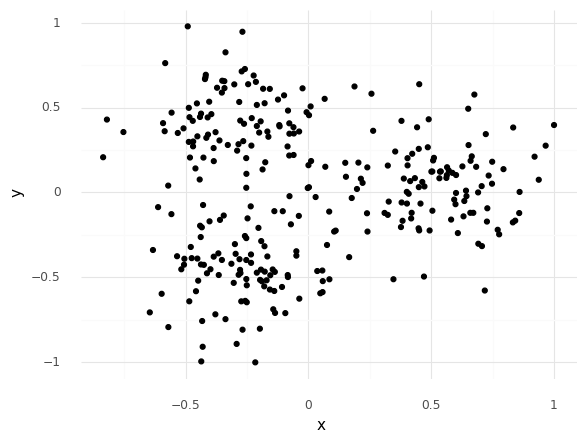

<ggplot: (158986135194)>

In [187]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

z =preprocessing.MaxAbsScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [188]:
d2.head()

,x,y
0,0.675521,0.576250
1,0.748134,0.180848
2,0.651823,0.278903
3,0.564436,0.148541
4,0.418171,-0.152886


K-means

<AxesSubplot:xlabel='x', ylabel='y'>

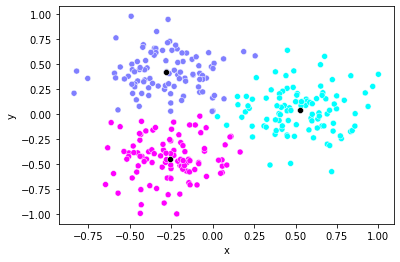

In [189]:
#using K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(d2)
#print(kmeans.cluster_centers_)
#print(kmeans.labels_)

sns.scatterplot(x=d2['x'], y=d2['y'], c=kmeans.labels_, cmap='cool' )
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [190]:
# grab only clustered data points
d2["assignments"] =kmeans.labels_
d2_clustered = d2.loc[(d2.assignments >= 0)]
#silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"])

In [191]:
# overall 
silhouette_score(d2[["x","y"]], d2["assignments"])

0.5588737373479451

Hierarchical Clustering

In [93]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(d2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [94]:
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


<AxesSubplot:xlabel='x', ylabel='y'>

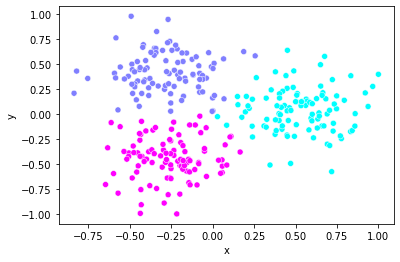

In [95]:
sns.scatterplot(x=d2['x'], y=d2['y'], c=cluster.labels_, cmap='cool' )

In [22]:
d2["assignments"] =cluster.labels_
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"])

0.5588737373479451

In [23]:
# overall 
silhouette_score(d2[["x","y"]], d2["assignments"])

0.5588737373479451

DBSCAN

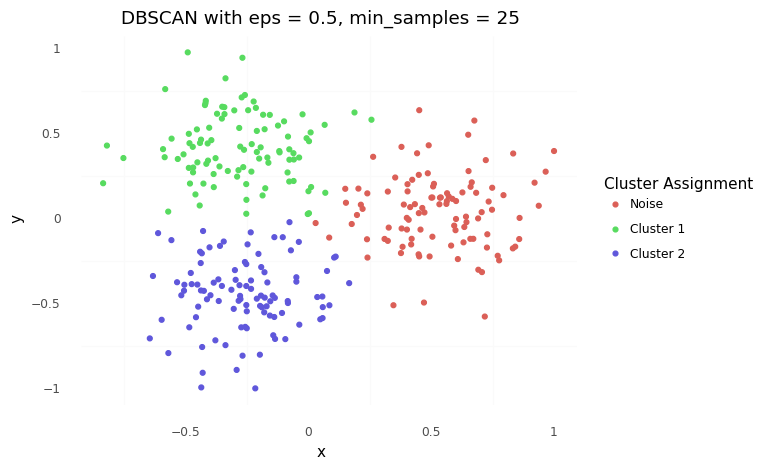

<ggplot: (158978285129)>

In [24]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [96]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

#print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))

# overall 
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.5588737373479451


GMM

<AxesSubplot:xlabel='x', ylabel='y'>

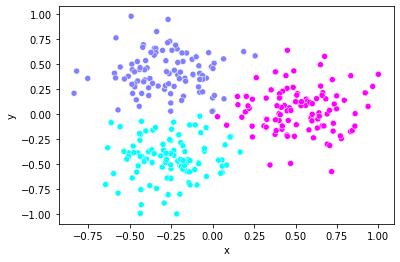

In [97]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(d2)
labels = gm.predict(d2)
sns.scatterplot(x=d2['x'], y=d2['y'], c=labels, cmap='cool' )

In [98]:
d2["assignments"] =labels
d2_clustered = d2.loc[(d2.assignments >= 0)]
silhouette_score(d2[["x","y"]], d2["assignments"])

0.5588737373479451

## Dataset 3

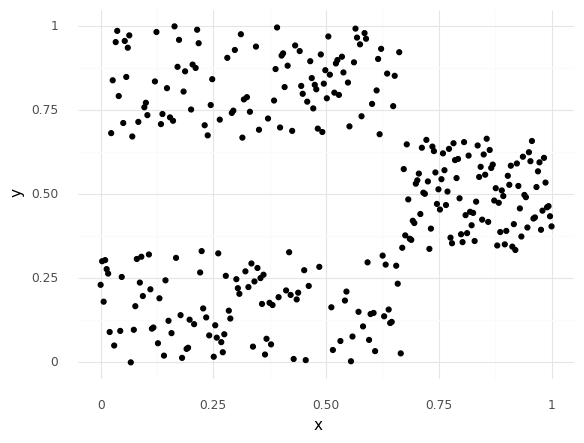

<ggplot: (158982242196)>

In [117]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z =preprocessing.QuantileTransformer(random_state=0)
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

K-means

<AxesSubplot:xlabel='x', ylabel='y'>

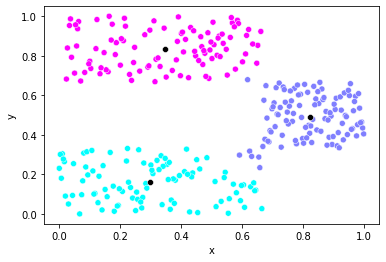

In [192]:
#using K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(d3)
kmeans.cluster_centers_
kmeans.labels_

sns.scatterplot(x=d3['x'], y=d3['y'], c=kmeans.labels_, cmap='cool' )
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [194]:
# grab only clustered data points
d3["assignments"] =kmeans.labels_
d3_clustered = d3.loc[(d3.assignments >= 0)]
#print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))
# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.5807662263537466


Hierarchical Clustering

In [195]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(d3)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [196]:
print(cluster.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


<AxesSubplot:xlabel='x', ylabel='y'>

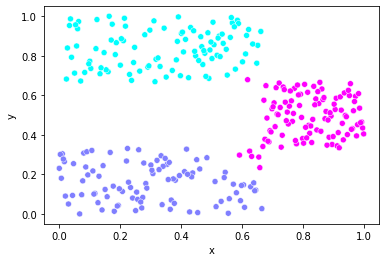

In [197]:
sns.scatterplot(x=d3['x'], y=d3['y'], c=cluster.labels_, cmap='cool' )

In [198]:
# grab only clustered data points
d3["assignments"] =cluster.labels_
d3_clustered = d3.loc[(d3.assignments >= 0)]
#print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))
# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.5807662263537466


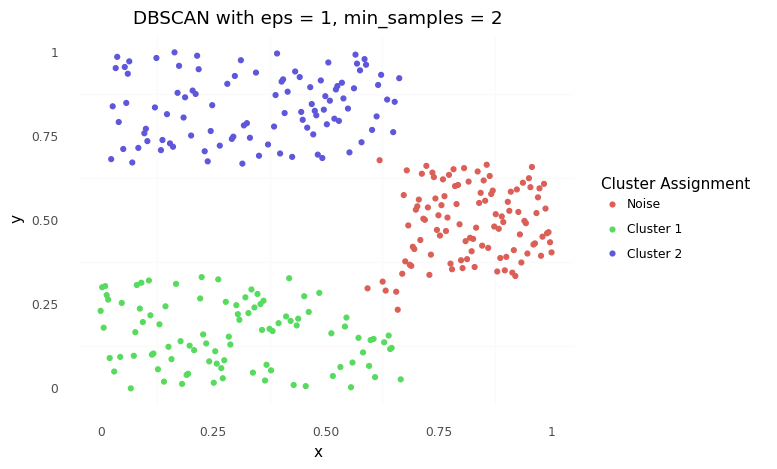

<ggplot: (158982555995)>

In [199]:
db3 = DBSCAN(eps = 1, min_samples = 2).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [200]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

#print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))

# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.5807662263537466


GMM

<AxesSubplot:xlabel='x', ylabel='y'>

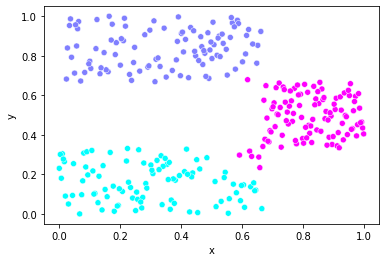

In [240]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(d3)
labels = gm.predict(d3)
sns.scatterplot(x=d3['x'], y=d3['y'], c=labels, cmap='cool' )

In [202]:
d3["assignments"] =labels
d3_clustered = d3.loc[(d3.assignments >= 0)]
silhouette_score(d3[["x","y"]], d3["assignments"])

0.5807662263537466

## Dataset 4

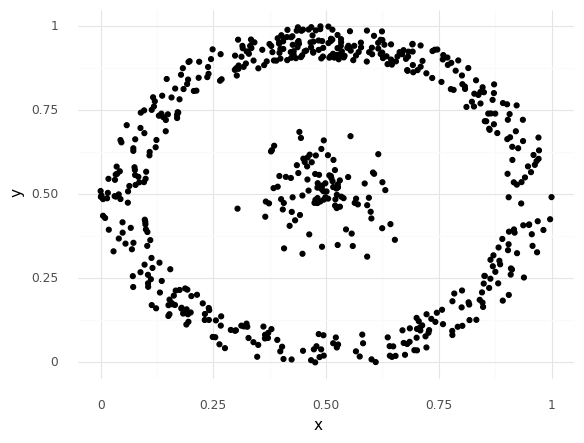

<ggplot: (129654151949)>

In [3]:
from sklearn import preprocessing
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z =preprocessing.MinMaxScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

K-means

<AxesSubplot:xlabel='x', ylabel='y'>

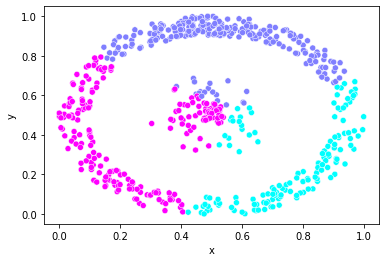

In [4]:
#using K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(d4)
kmeans.cluster_centers_
kmeans.labels_

sns.scatterplot(x=d4['x'], y=d4['y'], c=kmeans.labels_, cmap='cool' )
#sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [5]:
# grab only clustered data points
d4["assignments"] =kmeans.labels_
d4_clustered = d4.loc[(d4.assignments >= 0)]
#print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))
# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

0.42867270000767843


Hierarchical Clustering

In [6]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(d4)

array([0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1,
       0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0,
       2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0,

In [7]:
cluster.labels_

array([0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1,
       0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1,
       0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0,
       2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0,

<AxesSubplot:xlabel='x', ylabel='y'>

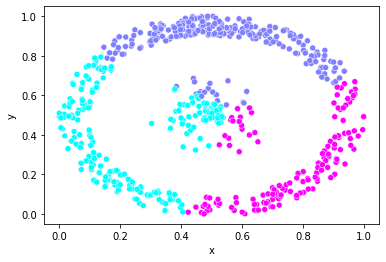

In [8]:
sns.scatterplot(x=d4['x'], y=d4['y'], c=cluster.labels_, cmap='cool' )

In [9]:
# grab only clustered data points
d4["assignments"] =kmeans.labels_
d4_clustered = d4.loc[(d4.assignments >= 0)]
#print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))
# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

0.42867270000767843


DBSCAN

In [10]:
clustering = DBSCAN(eps=1.5, min_samples=10).fit(d4)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

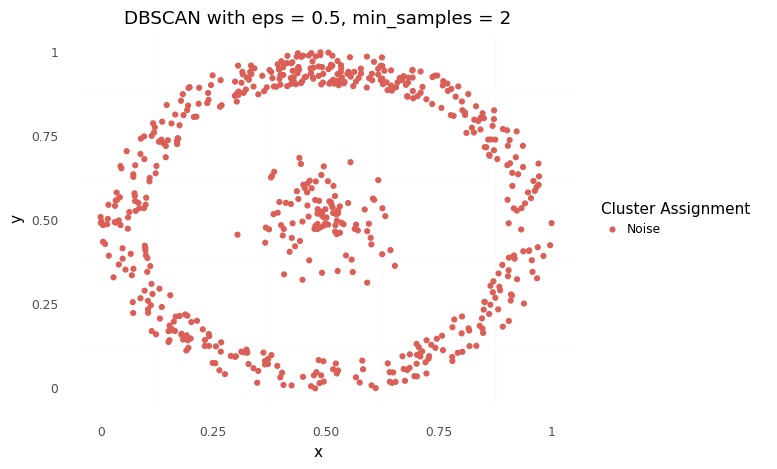

<ggplot: (129523973226)>

In [20]:
db4 = DBSCAN(eps =0.7, min_samples =5).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 2"))

In [212]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

#print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))

# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

0.42851260839158917


GMM

<AxesSubplot:xlabel='x', ylabel='y'>

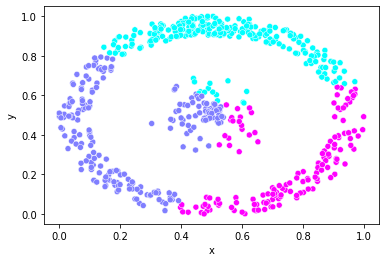

In [241]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(d4)
labels = gm.predict(d4)
sns.scatterplot(x=d4['x'], y=d4['y'], c=labels, cmap='cool' )

In [242]:
d4["assignments"] =labels
d4_clustered = d4.loc[(d4.assignments >= 0)]
silhouette_score(d4[["x","y"]], d4["assignments"])

0.4282883332310462

### Compare

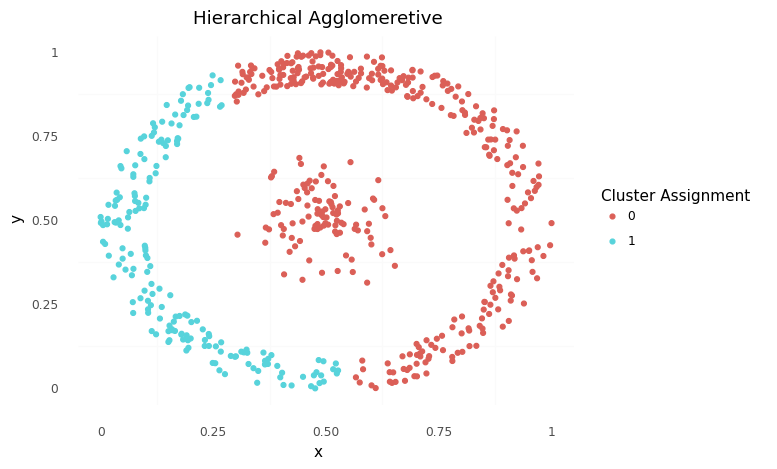

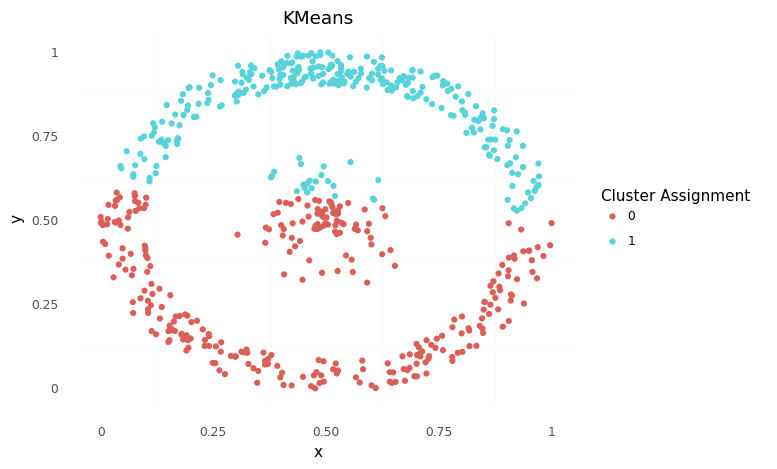

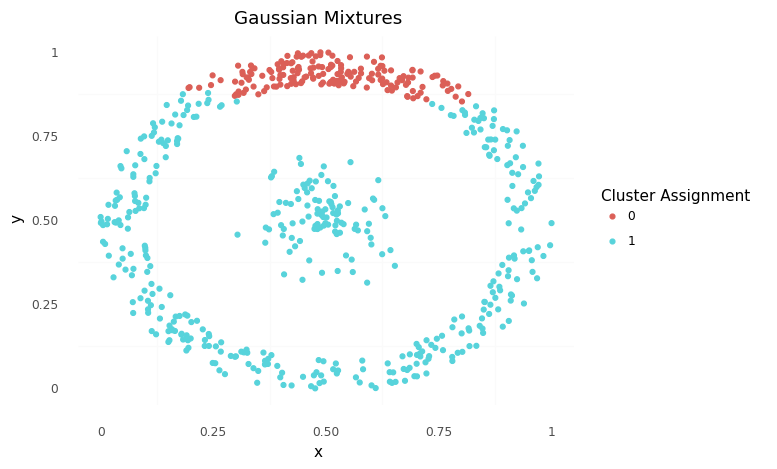

In [215]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

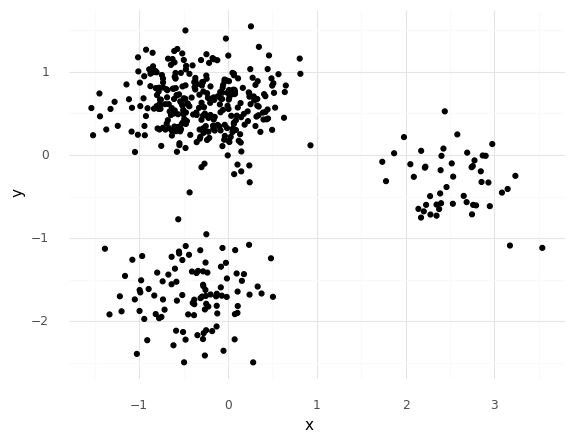

<ggplot: (158988646623)>

In [216]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

K-means

<AxesSubplot:xlabel='x', ylabel='y'>

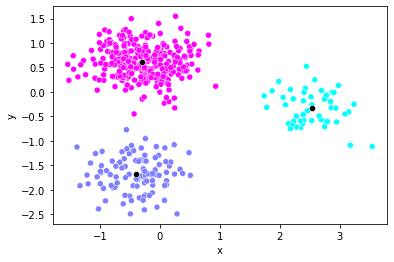

In [217]:
#using K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(d5)
kmeans.cluster_centers_
kmeans.labels_

sns.scatterplot(x=d5['x'], y=d5['y'], c=kmeans.labels_, cmap='cool' )
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [218]:
# grab only clustered data points
d5["assignments"] =kmeans.labels_
d5_clustered = d5.loc[(d5.assignments >= 0)]
#print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))
# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7043537508086658


Hierarchical Clustering

In [219]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(d5)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [220]:
print(cluster.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


<AxesSubplot:xlabel='x', ylabel='y'>

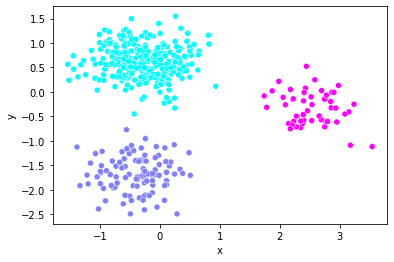

In [221]:
sns.scatterplot(x=d5['x'], y=d5['y'], c=cluster.labels_, cmap='cool' )

In [222]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

#print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7043537508086658


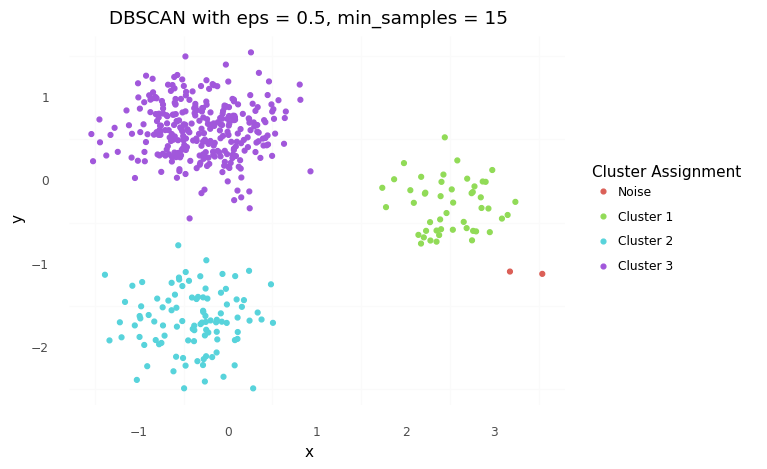

<ggplot: (158982384327)>

In [223]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [224]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

#print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.6714107830551044


GMM

<AxesSubplot:xlabel='x', ylabel='y'>

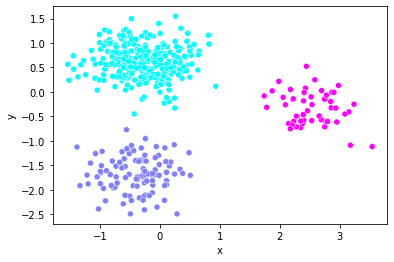

In [225]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(d5)
labels = gm.predict(d5)
sns.scatterplot(x=d5['x'], y=d5['y'], c=labels, cmap='cool' )

In [226]:
d5["assignments"] =labels
d5_clustered = d5.loc[(d5.assignments >= 0)]
silhouette_score(d5[["x","y"]], d5["assignments"])

0.7043537508086658

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

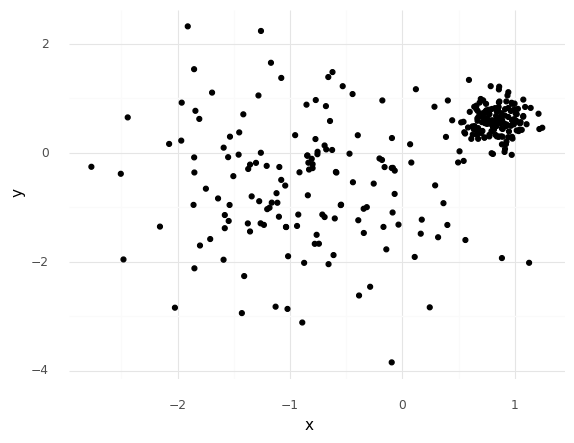

<ggplot: (158982386701)>

In [227]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

K-means

<AxesSubplot:xlabel='x', ylabel='y'>

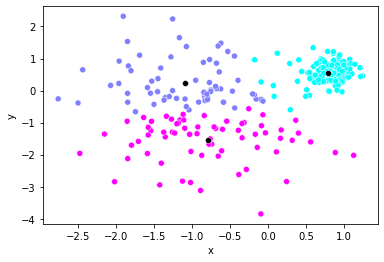

In [228]:
#using K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(d6)
kmeans.cluster_centers_
kmeans.labels_

sns.scatterplot(x=d6['x'], y=d6['y'], c=kmeans.labels_, cmap='cool' )
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [229]:
# grab only clustered data points
d6["assignments"] =kmeans.labels_
d6_clustered = d6.loc[(d6.assignments >= 0)]
#print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))
# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.5861497443577426


Hierarchical Clustering

In [230]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(d6)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1,
       2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2], d

In [231]:
print(cluster.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 2 0 1 2 0 2 0 0 1 0 0 0 0 2 2 2 0 2 2 0 0 2 2 1 1 0 2 0 0 0 1 2 1 0
 2 0 2 0 2 2 2 0 0 2 2 2 2 2 2 0 2 2 0 2 0 1 0 0 2 2 2 0 2 0 2 0 0 0 2 0 2
 2 2 2 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 2 2 0 0 2 2 0 0 0 2 0 0 2 0 2 0 1 2 0
 1 2 2 0 2 2 2 1 2 2 2 2 0 2 2 0 2 0 0 2 2 2 0 0 2 0 0 2 1 1 2 0 0 2 2 0 0
 2 0 0 2]


<AxesSubplot:xlabel='x', ylabel='y'>

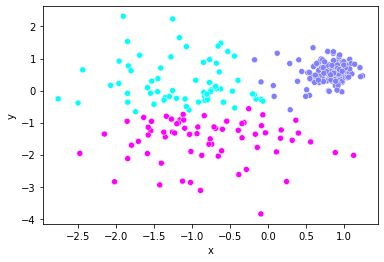

In [232]:
sns.scatterplot(x=d6['x'], y=d6['y'], c=cluster.labels_, cmap='cool' )

In [233]:
# grab only clustered data points
d6["assignments"] =kmeans.labels_
d6_clustered = d6.loc[(d6.assignments >= 0)]
#print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))
# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.5861497443577426


In [234]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(d6[["x", "y"]])

distances, neighbors = nn.kneighbors(d6[["x", "y"]])

distances

array([[0.        , 0.03690981, 0.04037236, 0.04597748],
       [0.        , 0.05516926, 0.08888159, 0.08986399],
       [0.        , 0.01648388, 0.02195778, 0.02314588],
       ...,
       [0.        , 0.06869733, 0.07309685, 0.07758794],
       [0.        , 0.45863691, 0.62402991, 0.6937056 ],
       [0.        , 0.3352202 , 0.35858311, 0.4012105 ]])

In [235]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

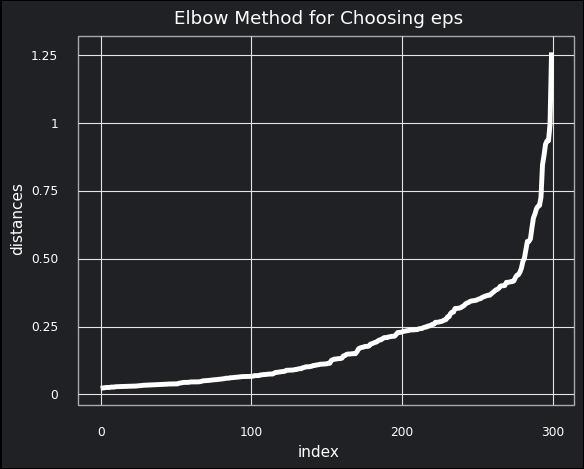

<ggplot: (158990451959)>

In [236]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

DBSCAN

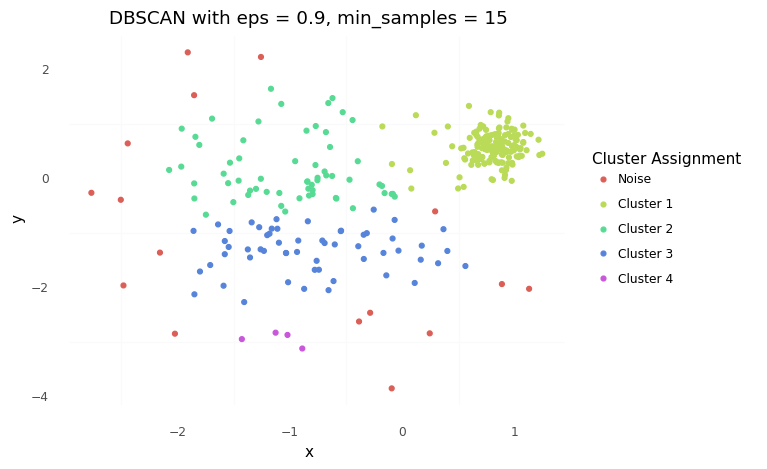

<ggplot: (158990519396)>

In [237]:
db6 = DBSCAN(eps = 0.45, min_samples = 3).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [238]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

#print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.537985377034852


GMM

<AxesSubplot:xlabel='x', ylabel='y'>

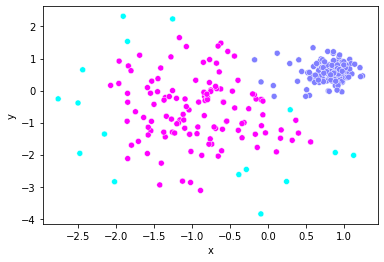

In [164]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(d6)
labels = gm.predict(d6)
sns.scatterplot(x=d6['x'], y=d6['y'], c=labels, cmap='cool' )

In [165]:
d6["assignments"] =labels
d6_clustered = d6.loc[(d6.assignments >= 0)]
silhouette_score(d6[["x","y"]], d6["assignments"])

0.5451432368726159